## @author - Pardeep
## transfer learning model using MobileNetV2
### reference :- https://keras.io/api/applications/mobilenet/#mobilenetv2-function

# Data Preprocessing

In [1]:
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   featurewise_center=False,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.2,1.0),
                                   channel_shift_range=0.2,
                                   fill_mode="nearest",
                                   vertical_flip=True,)
training_set = train_datagen.flow_from_directory(r'Data\train mix data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 272 images belonging to 30 classes.


### Preprocessing the Test set (contains random images only)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'Data\Google images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 30 classes.


### Preprocessing the test set (contains dataset images only)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory(r'Data\Dataset images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


# importing transfer learning model

In [5]:
# import necessary library
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import *

In [6]:
# load and creare a model object
v2model = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)
# model summary
#v2model.summary()

# preprocessing pre trained model

In [7]:
for layer in v2model.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [8]:
x = Flatten()(v2model.output)

## adding layer for classification

In [9]:
from glob import glob

In [10]:
prediction = Dense(30, activation='softmax')(x)

In [11]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [12]:
# create a model object
model = Model(inputs=v2model.input, outputs=prediction)

# Training the transfer learning model

### Compiling the CNN

In [13]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting 

In [14]:
from keras.callbacks import EarlyStopping

In [15]:
earlystop = EarlyStopping(monitor='accuracy', patience=3, verbose=2)

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size

In [38]:
a= model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN, callbacks= earlystop,epochs = 50)

Epoch 1/50
8/8 [==============================] - 10s 1s/step - loss: 1.0700 - accuracy: 0.9250
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 1.5351 - accuracy: 0.8917
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 1.0527 - accuracy: 0.9292
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.9995 - accuracy: 0.8958
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 1.1014 - accuracy: 0.9180
Epoch 6/50
8/8 [==============================] - 8s 963ms/step - loss: 1.1247 - accuracy: 0.9208
Epoch 00006: early stopping


### accuracy and losses

### Accuracy Over Random google images

In [27]:
STEP_SIZE_TEST=test_set.n//test_set.batch_size

In [39]:
test_loss, test_acc =model.evaluate(test_set)
print("Accuracy on google images: ",test_acc)

4/4 [==============================] - 3s 612ms/step - loss: 0.3134 - accuracy: 0.9754
Accuracy on google images:  0.9754098653793335


### Accuracy Over Dataset Images

In [40]:
print("loss on google images: ",test_loss)

loss on google images:  0.31335997581481934


In [30]:
STEP_SIZE_VALID=val_set.n//val_set.batch_size

In [41]:
test_loss, test_acc =model.evaluate(val_set,steps=STEP_SIZE_VALID)
print("Accuracy on Dataset images: ",test_acc)

4/4 [==============================] - 4s 856ms/step - loss: 2.1775 - accuracy: 0.8438
Accuracy on Dataset images:  0.84375


In [42]:
print("loss on Dataset images: ",test_loss)

loss on Dataset images:  2.177480459213257


In [33]:
import matplotlib.pyplot as plt

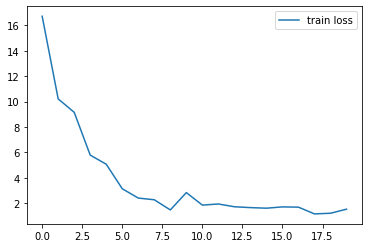

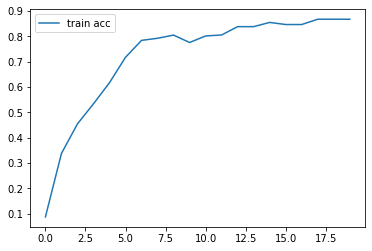

In [34]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

## saving a model

In [43]:
import tensorflow as tf

from keras.models import load_model

model.save('limiteddatamobilenetv2.h5')

# This Trained over 5 images from Dataset data and rest from Google fetched pics